<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombre:** José Fernando Flores.

**Fecha:** 10 de marzo del 2020.

**Expediente** : 714575.
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea Opcional: Clase 11


## Tarea Opcional
> Usando notebook de jupyter generar valores aleatorios


Generar valores aleatorios para la siguiente distribución de probabilidad
    $$f(x)=\begin{cases}\frac{2}{(c-a)(b-a)}(x-a), & a\leq x \leq b\\ \frac{-2}{(c-a)(c-b)}(x-c),& b\leq x \leq c \end{cases}$$ con a=1; b=2; c=5
1. Usando el método de la transformada inversa.
2. Usando el método de aceptación y rechazo.
3. En la librería `import scipy.stats as st` hay una función que genera variables aleatorias triangulares `st.triang.pdf(x, c, loc, scale)` donde "c,loc,scale" son los parámetros de esta distribución (similares a los que  nuestra función se llaman a,b,c, PERO NO IGUALES). Explorar el help de python para encontrar la equivalencia entre los parámetros "c,loc,scale" y los parámetros de nuestra función con parámetros "a,b,c". La solución esperada es como se muestra a continuación:
![imagen.png](attachment:imagen.png)

4. Generar 1000 variables aleatorias usando la función creada en el punto 2 y usando la función `st.triang.rvs` y graficar el histograma en dos gráficas diferentes de cada uno de los conjuntos de variables aleatorios creado. Se espera algo como esto:

In [1]:
# Importar librerías
from scipy import optimize
from scipy.stats import beta
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib notebook
%matplotlib inline

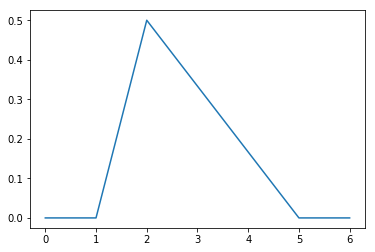

In [2]:

w = np.arange(0,6.01,0.01)

#función por partes
def f(w):
    return np.piecewise(w, [w>5, w<5, w<=2,w<=1,w<1], [lambda x: 0, lambda x: (5-x)/6, lambda x: 0.5*(x-1), lambda x: 0.5*(x-1),lambda x: 0])

plt.plot(w,f(w))


In [3]:
# Función de aceptación y rechazo usando compresión de listas
def Acep_rechazo(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = list(map(f,R1))
    t_x = t(R1)
    condition = R2*t_x <=f_x
    [plt.plot(R1[i],R2[i]*t_x[i],'ob') if condition[i] else plt.plot(R1[i],R2[i]*t_x[i],'o') \
         for i in range(len(R1))]
                
    plt.show()
    a = [i for i in range(N) if condition[i]]
    print('El porcentaje de puntos de aceptación es de:',len(a)/N)

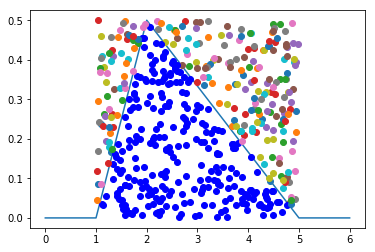

El porcentaje de puntos de aceptación es de: 0.512


In [4]:
df = lambda x: 0.5*(x-1) if 1<=x<=2 else (5-x)/6 if 2<x<=5 else 0

max_f = 0.5
t = lambda x: max_f*np.ones(len(x))
N = 500
R2 = np.random.rand(N)
R1 = 4*np.random.rand(N)+1

a = list(map(df,w))
plt.plot(w,a)
Acep_rechazo(R2,R1,df,t)


In [14]:
def Acep_rechazo2(R2:'Variables distruidas U~U(0,1)',
                 R1:'Variables distribuidas como g(x)',
                 f:'función objetivo a generar',
                 t:'función que mayora a f'):
#     R1 = np.random.rand(N)
    f_x = list(map(f,R1))
    t_x = t(R1)
    condition = R2*t_x <=f_x
    
    a = [R1[i] if condition[i] else 0 for i in range(len(R1))]
    c = list(filter(lambda x: 0 < x, a ))
    
    plt.hist(c,30,density=True)
    return 

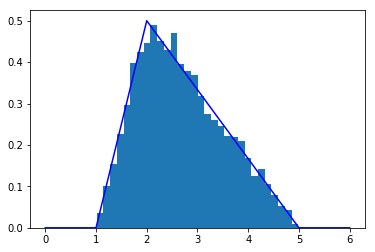

In [15]:
N_ = 10**4
R2_ = np.random.rand(N_)
R1_ = 4*np.random.rand(N_)+1

plt.plot(w,a,'b-')
Acep_rechazo2(R2_,R1_,df,t)

C:\Users\Fernando\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


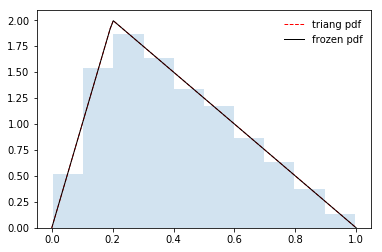

In [9]:
from scipy.stats import triang
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

c = .2
mean, var, skew, kurt = triang.stats(c, moments='mvsk')

x = np.linspace(triang.ppf(0, c), triang.ppf(1, c), 100)
ax.plot(x, triang.pdf(x, c), 'r--', lw=1, alpha=1, label='triang pdf')

rv = triang(c)
ax.plot(x, rv.pdf(x), 'k-', lw=1, label='frozen pdf')

r = triang.rvs(c, size=10**4)

ax.hist(r, normed=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

In [10]:
r = triang.rvs(c, size=1000)

ax.hist(r, normed=True, histtype='stepfilled', alpha=0.2)
#ax.legend(loc='best', frameon=False)
plt.show()

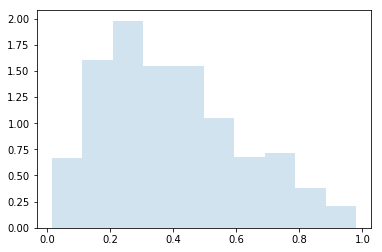

In [11]:
r = triang.rvs(c, size=1000)
plt.hist(r, normed=True, histtype='stepfilled', alpha=0.2)
#ax.legend(loc='best', frameon=False)
plt.show()